# Midterm Code

- In this project, we will use the review text/Summary, like/dislike from review information on kaggle(https://www.kaggle.com/competitions/cs506-fall-2022/data) to predict the review scores using SVM, Logistic regression, Linear regression，Random Forest Method.
- We will first try to use stem and tfidf from snowballerstemmer to construct the matrix of text and summary, using the above methods to see the accuracy of the prediction.
- Then, use Textblob package which is a text sentiment analyzing package that did not use deep learning(confirmed with TA), and again using above methods to see the accuracy.
- After that, I concatenate the textblob dataset with the tfidf matrix with the original training dataset to test the above methods for accuracy.

## Preliminary Analysis

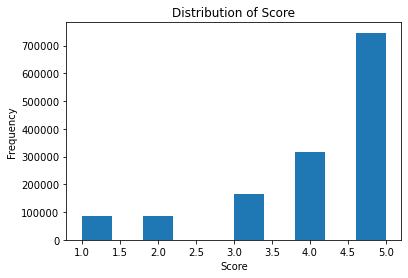

In [25]:
# explore each variable and its relationship with the target variable(score)

import matplotlib.pyplot as plt
import pandas as pd
X_train = pd.read_csv('./data/X_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
# plot the distribution of the target variable

plt.hist(X_train['Score'], bins=10)

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Score')
plt.show()

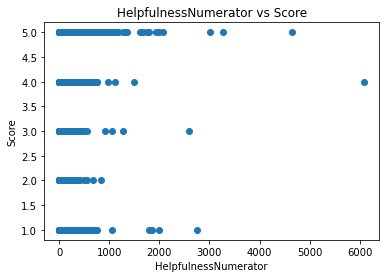

In [26]:
# plot the relationship between the target variable and each of the features
## HelpfulnessNumerator and Score
plt.scatter(X_train['HelpfulnessNumerator'], X_train['Score'])
plt.xlabel('HelpfulnessNumerator')
plt.ylabel('Score')
plt.title('HelpfulnessNumerator vs Score')
plt.show()

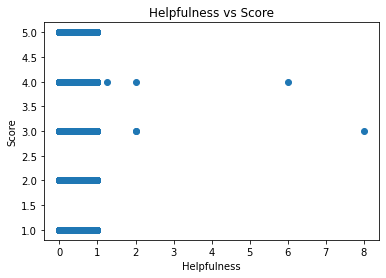

In [27]:
plt.scatter (X_train['HelpfulnessNumerator']/X_train['HelpfulnessDenominator'], X_train['Score'])
plt.xlabel('Helpfulness')
plt.ylabel('Score')
plt.title('Helpfulness vs Score')
plt.show()

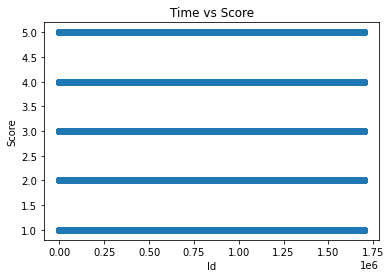

In [29]:
plt.scatter(X_train['Id'], X_train['Score'])
plt.xlabel('Id')
plt.ylabel('Score')
plt.title('Time vs Score')
plt.show()

## Preprocessing the Data

In [1]:
from nltk.stem.snowball import SnowballStemmer
from snowballstemmer import stemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
## Read the data
print("Reading the data")
X_train = pd.read_csv("./data/X_train.csv") 
X_test = pd.read_csv("./data/X_test.csv")
X_train['Total'] = X_train['Text'] + X_train['Summary']
X_test['Total'] = X_test['Text'] + X_test['Summary']

## Train Stemming
print("Train Stemming")
df_train_text = pd.DataFrame(X_train['Total'])
stemmer = SnowballStemmer("english", ignore_stopwords=True)

def stem(text):
    return ' '.join([stemmer.stem(word) for word in word_tokenize(text)])

df_train_text['Total'] = df_train_text['Total'].fillna("").apply(stem)
df_train_text.to_csv("./data/df_train_text.csv", index=False)

## Test Stemming
print("Test Stemming")
df_test_text = pd.DataFrame(X_test['Total'])
df_test_text['Total'] = df_test_text['Total'].fillna("").apply(stem)
df_test_text.to_csv("./data/df_test_text.csv", index=False)


stem_train = pd.read_csv("./data/df_train_text.csv")
stem_test = pd.read_csv("./data/df_test_text.csv")

stem_train.fillna(' ',inplace=True)
stem_test.fillna(' ',inplace=True)

import numpy as np
## Train TF-IDF
print("Train TF-IDF")
vectorizer = TfidfVectorizer(max_df=.999,min_df=0.05,max_features=10000)
tfidf_train = vectorizer.fit_transform(stem_train['Total'].apply(lambda x: np.str_(x)))
train_matrix = pd.DataFrame(tfidf_train.toarray(), columns=vectorizer.get_feature_names())
train_matrix.to_csv("tfidf_train.csv")

## Test TF-IDF
print("Test TF-IDF")
tfidf_test = vectorizer.transform(stem_test['Total'].apply(lambda x: np.str_(x)))
test_matrix = pd.DataFrame(tfidf_test.toarray(), columns=vectorizer.get_feature_names())
test_matrix.to_csv("tfidf_test.csv")

## Combine TF-IDF with other features
print("Combine TF-IDF with other features")
train_tfidf = pd.read_csv("tfidf_train.csv")
test_tfidf = pd.read_csv("tfidf_test.csv")
train = pd.concat([X_train,train_tfidf],axis=1)
test = pd.concat([X_test,test_tfidf],axis=1)

## Drop unnecessary columns
print("Drop unnecessary columns")
train_processed = train.drop(columns=['Id','ProductId','UserId','Summary','Text','Unnamed: 0','Time','Total'])
train_processed.fillna(0,inplace=True)
test_processed = test.drop(columns=['Id','ProductId','UserId','Summary','Text','Unnamed: 0','Time','Total'])
test_processed.fillna(0,inplace=True)


## Save the processed data
print("Save the processed data")
train_processed.to_csv("./data/train_processed.csv", index=False)
test_processed.to_csv("./data/test_processed.csv", index=False)



Reading the data
Train Stemming
Test Stemming
Train TF-IDF
Test TF-IDF
Combine TF-IDF with other features
Drop unnecessary columns
Save the processed data


## SVM method with tfidf matrix

/Users/jonathanzha/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Accuracy on testing set =  0.5763647060694239


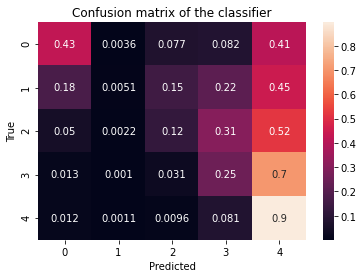

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
SVM_train = pd.read_csv("./data/train_processed.csv")
SVM_test = pd.read_csv("./data/test_processed.csv")
SVM_test.drop(columns=['Score'],inplace=True)
x_train, x_test, y_train, y_test = train_test_split(SVM_train.drop(['Score'],axis=1), SVM_train['Score'], test_size=0.9, random_state=0)

model=LinearSVC().fit(x_train,y_train)
Y_test_predictions = model.predict(x_test)
X_test['Score'] = model.predict(SVM_test)

print("Accuracy on testing set = ", accuracy_score(y_test, Y_test_predictions))

import seaborn as sns
cm = confusion_matrix(y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
submission_SVM = X_test[['Id', 'Score']]
submission_SVM.to_csv("./data/SVM_tfidf_submission.csv", index=False)

## Logistic Regression method with tfidf matrix

/Users/jonathanzha/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on testing set =  0.5860147566019336
MSE on test set =  1.3811795059461869


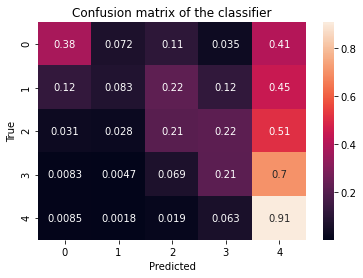

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
LogReg_train = pd.read_csv("./data/train_processed.csv")
LogReg_test = pd.read_csv("./data/test_processed.csv")
LogReg_test.drop(columns=['Score'],inplace=True)
x_train, x_test, y_train, y_test = train_test_split(LogReg_train.drop(['Score'],axis=1), LogReg_train['Score'], test_size=0.7, random_state=0)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16,max_iter=500).fit(x_train, y_train)

# fit the model with data

y_pred_logreg = logreg.predict(x_test)
X_test['Score'] = logreg.predict(LogReg_test)
print("Accuracy on testing set = ", accuracy_score(y_test, y_pred_logreg))
print("MSE on test set = ", mean_squared_error(y_test, y_pred_logreg))

import seaborn as sns
cm = confusion_matrix(y_test, y_pred_logreg, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
submission_Logreg = X_test[['Id', 'Score']]
submission_Logreg.to_csv("./data/Logreg_tfidf_submission.csv", index=False)


## RandomForest Method on Tfidf matrix

Accuracy on testing set =  0.5691824017799778


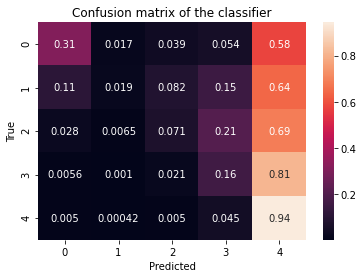

In [7]:
from sklearn.ensemble import RandomForestClassifier

RF_train = pd.read_csv("./data/train_processed.csv")
RF_test = pd.read_csv("./data/test_processed.csv")
RF_test.drop(columns=['Score'],inplace=True)
x_train, x_test, y_train, y_test = train_test_split(RF_train.drop(['Score'],axis=1), RF_train['Score'], test_size=0.95, random_state=0)

# instantiate the model (using the default parameters)
rf = RandomForestClassifier(random_state=16).fit(x_train, y_train)

# fit the model with data

y_pred_rf = rf.predict(x_test)
X_test['Score'] = rf.predict(RF_test)
print("Accuracy on testing set = ", accuracy_score(y_test, y_pred_rf))

import seaborn as sns
cm = confusion_matrix(y_test, y_pred_rf, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

submission_RF = X_test[['Id', 'Score']]
submission_RF.to_csv("./data/RF_tfidf_submission.csv", index=False)


## Linear Regression with TFIDF Matrix

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LR_train = pd.read_csv("./data/train_processed.csv")
LR_test = pd.read_csv("./data/test_processed.csv")
LR_test.drop(columns=['Score'],inplace=True)
x_train, x_test, y_train, y_test = train_test_split(LR_train.drop(['Score'],axis=1), LR_train['Score'], test_size=0.1, random_state=0)

# instantiate the model (using the default parameters)
regr = LinearRegression().fit(x_train, y_train)

# fit the model with data

y_pred_regr = regr.predict(x_test)

X_test['Score'] = regr.predict(LR_test)
print("Accuracy on testing set = ", r2_score(y_test, y_pred_regr), mean_squared_error(y_test, y_pred_regr))

def round_score(x):
    if x < 1.5:
        return 1
    elif x > 4.5:
        return 5
    elif x > 3.5:
        return 4
    elif x > 2.5:
        return 3
    elif x > 1.5:
        return 2
    else:
        return x
regr_tfidf_submission = X_test[['Id', 'Score']]
regr_tfidf_submission['Score'] = regr_tfidf_submission['Score'].apply(round_score)
regr_tfidf_submission.to_csv("./data/LinearRegression_tfidf_submission.csv", index=False)

Accuracy on testing set =  0.2727548160051855 1.0454923817671957


<ipython-input-10-3fe9179e2a0c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regr_tfidf_submission['Score'] = regr_tfidf_submission['Score'].apply(round_score)


## Textblob Package Preprocessing

In [12]:
from textblob import TextBlob
X_train = pd.read_csv("./data/X_train.csv") 
X_test = pd.read_csv("./data/X_test.csv")

X_train['Text_Sentiment'] = X_train['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
X_train['Summary_Sentiment'] = X_train['Summary'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

X_test['Text_Sentiment'] = X_test['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
X_test['Summary_Sentiment'] = X_test['Summary'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

X_train.drop(columns=['Summary','Text'],inplace=True)
X_test.drop(columns=['Summary','Text'],inplace=True)

X_train.to_csv("X_train_sentiment.csv")
X_test.to_csv("X_test_sentiment.csv")

X_train_textblob = pd.read_csv("X_train_sentiment.csv")
X_test_textblob = pd.read_csv("X_test_sentiment.csv")

X_train_textblob.drop(columns = ['Unnamed: 0','Id','ProductId','UserId','Time'],inplace=True)
X_test_textblob.drop(columns = ['Unnamed: 0','Id','ProductId','UserId','Score','Time'],inplace=True)




In [18]:

tfidf_textblob_train = pd.concat([train_matrix, X_train_textblob], axis=1)
tfidf_textblob_test = pd.concat([test_matrix, X_test_textblob], axis=1)

## Linear regression with TFIDF and Textblob(Best Submission)

In [19]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(tfidf_textblob_train.drop(['Score'],axis=1), tfidf_textblob_train['Score'], test_size=0.1, random_state=0)
regr = LinearRegression(n_jobs=-1)
regr_model = regr.fit(x_train4, y_train4)
y_pred = regr_model.predict(x_test4)
X_test['Score'] = regr_model.predict(tfidf_textblob_test)
print("MSE on testing set = ", mean_squared_error(y_test4, y_pred))
def round_score_2(x):
    if x < 1.5:
        return 1
    elif x > 4.5:
        return 5
    elif x > 3.5:
        return 4
    elif x > 2.5:
        return 3
    elif x > 1.5:
        return 2
    else:
        return x
submission_regr_tfidf_textblob = X_test[['Id', 'Score']]
submission_regr_tfidf_textblob['Score'] = submission_regr_tfidf_textblob['Score'].apply(round_score_2)
submission_regr_tfidf_textblob.to_csv("./data/LinearRegression_tfidf_textblob_submission.csv", index=False)

MSE on testing set =  0.8260710970525929


<ipython-input-19-e71c73ab01fe>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_regr_tfidf_textblob['Score'] = submission_regr_tfidf_textblob['Score'].apply(round_score_2)


## Logistic Regression with Tfidf and Textblob

Accuracy on testing set =  0.6266925217270417
MSE on test set =  0.9873920803374105


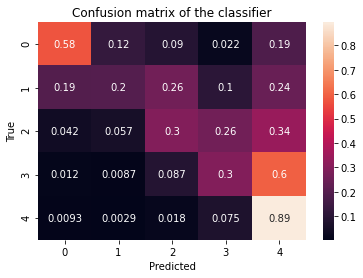

In [31]:

x_train, x_test, y_train, y_test = train_test_split(tfidf_textblob_train.drop(['Score'],axis=1), tfidf_textblob_train['Score'], test_size=0.7, random_state=0)

# instantiate the model
logreg = LogisticRegression(max_iter=10000).fit(x_train, y_train)

# fit the model with data

y_pred_logreg = logreg.predict(x_test)
X_test['Score'] = logreg.predict(tfidf_textblob_test)
print("Accuracy on testing set = ", accuracy_score(y_test, y_pred_logreg))
print("MSE on test set = ", mean_squared_error(y_test, y_pred_logreg))

import seaborn as sns
cm = confusion_matrix(y_test, y_pred_logreg, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
submission_Logreg = X_test[['Id', 'Score']]
submission_Logreg.to_csv("./data/Logreg_tfidf_Textblob_submission.csv", index=False)